In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import numpy as np

In [2]:
diamonds = pd.read_csv(r'C:\Users\gixi_\Ironhack\DAFT_212\module_2\Project_Week_4/diamonds_clean.csv')
diamonds.drop('Unnamed: 0', axis = 1, inplace = True)
diamonds.drop('validate_z', axis = 1, inplace = True)
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_grades,color_grades
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,0


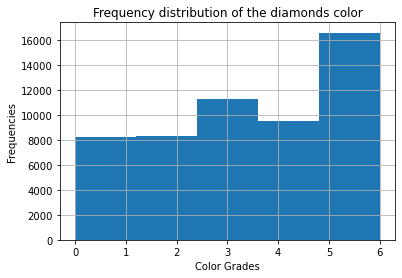

In [3]:
plt.hist(diamonds['color_grades'],bins=5)
plt.xlabel('Color Grades')
plt.ylabel('Frequencies') 
plt.title('Frequency distribution of the diamonds color')
plt.grid()
plt.show()

<AxesSubplot:xlabel='color_grades', ylabel='count'>

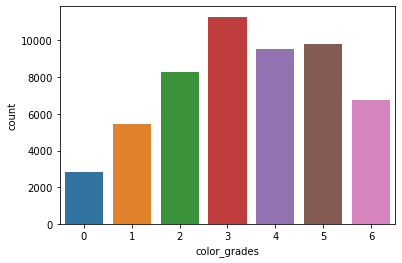

In [4]:
sns.countplot(x="color_grades", data=diamonds)

C:\Users\gixi_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

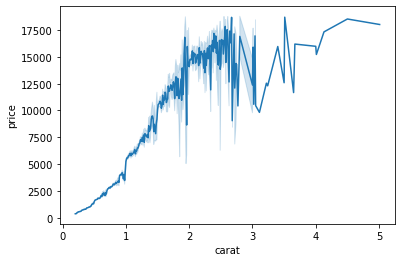

In [5]:
sns.lineplot(diamonds.carat, diamonds.price)

No handles with labels found to put in legend.


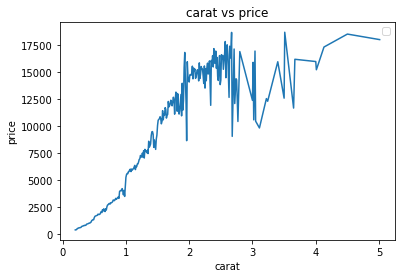

In [6]:
df1 = diamonds.pivot_table(index = 'carat', values = 'price', aggfunc = 'mean')
plt.plot(df1.index, df1.price)
plt.xlabel('carat')
plt.ylabel('price')
plt.title("carat vs price")
plt.legend()
plt.show()

No handles with labels found to put in legend.


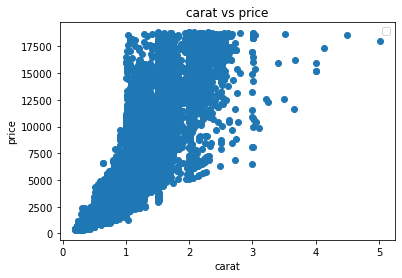

In [7]:
plt.scatter(diamonds['carat'], diamonds['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.title("carat vs price")
plt.legend()
plt.show()

[Text(0.5, 1.0, 'carat vs price')]

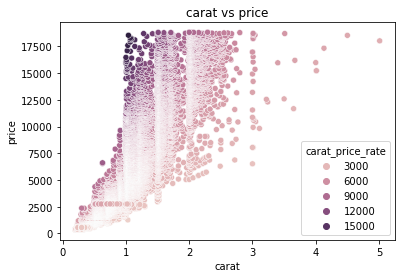

In [8]:
carat_price_rate = diamonds.eval("price/carat").rename("carat_price_rate")
sns.scatterplot(data=diamonds, x="carat", y="price", hue=carat_price_rate).set(title = "carat vs price")


Text(0.5, 1.0, 'Diamond Price')

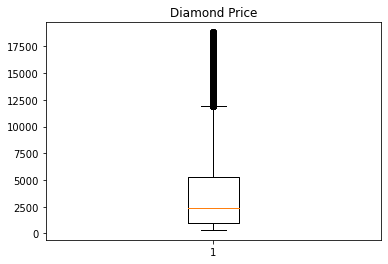

In [9]:
plt.boxplot(diamonds['price'])
plt.title("Diamond Price")

<AxesSubplot:xlabel='color_grades', ylabel='price'>

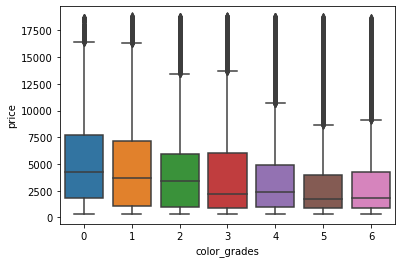

In [10]:
sns.boxplot(x=diamonds["color_grades"],y = diamonds["price"],data = diamonds)

<AxesSubplot:ylabel='color'>

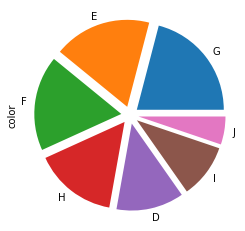

In [17]:
explode = (0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1)
diamonds['color'].value_counts().plot(kind='pie', explode=explode)

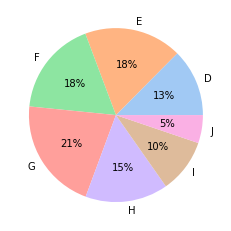

In [24]:
x = diamonds[['color']].groupby('color').agg({'color':'count'}).rename(columns={'color': 'color_count'})
x.reset_index(inplace = True)
colors = sns.color_palette('pastel')[0:7]
plt.pie(x['color_count'], labels = x['color'], colors = colors, autopct='%.0f%%')
plt.show()

In [58]:
import plotly.express as px
import pandas as pd
df = diamonds.groupby('color')['price'].mean().to_frame()
df.reset_index(inplace=True)
fig = px.line_polar(df, r='price', theta='color', line_close=True)
figsize=(5,5)
fig.show()

In [60]:
df1 = diamonds.groupby('cut')['price'].mean().to_frame()
df1.reset_index(inplace=True)
fig = px.line_polar(df1, r='price', theta='cut', line_close=True)
figsize=(5,5)
fig.show()

<IPython.core.display.Javascript object>


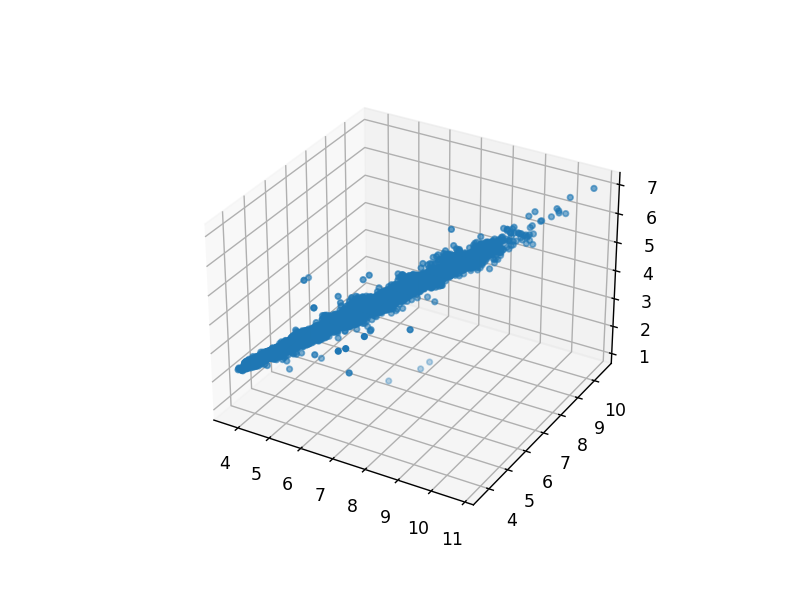

In [81]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(diamonds.x, diamonds.y, diamonds.z, s=10)

<IPython.core.display.Javascript object>


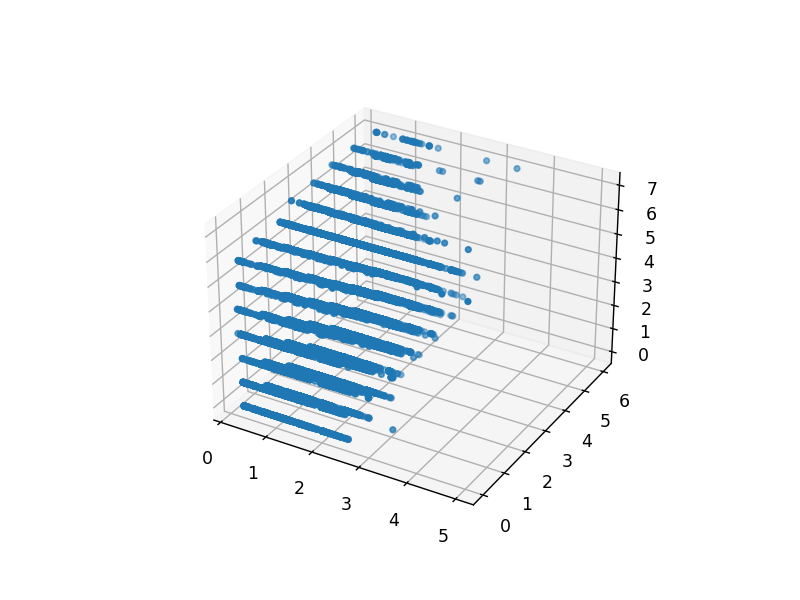

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(diamonds.carat, diamonds.color_grades, diamonds.clarity_grades, s=10)

<IPython.core.display.Javascript object>


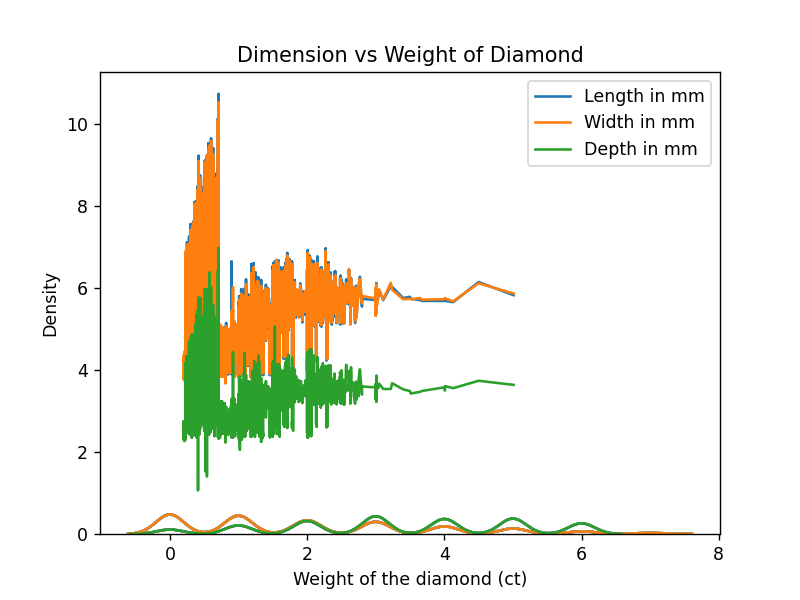

In [116]:
fig, ax = plt.subplots()

ax.plot(diamonds['carat'].sort_values(ascending = True), diamonds['x'], label = 'Length in mm')
ax.plot(diamonds['carat'].sort_values(ascending = True), diamonds['y'], label = 'Width in mm')
ax.plot(diamonds['carat'].sort_values(ascending = True), diamonds['z'], label = 'Depth in mm')
plt.xlabel('Weight of the diamond (ct)')
plt.title('Dimension vs Weight of Diamond')
plt.legend()
plt.show()

In [132]:
sns.kdeplot(data=diamonds, x="clarity_grades", label = 'Diamond Clarity')

<AxesSubplot:label='8813e281-8241-428f-adf2-df4aec1bff6b', xlabel='clarity_grades', ylabel='Density'>